In [44]:
"""debug example"""
# for i in [1,2,3,4,5]:
#     print(i)
    #import ipdb; ipdb.set_trace() # debugging starts here
    # http://frid.github.io/blog/2014/06/05/python-ipdb-cheatsheet/

'debug example'

In [ ]:
# Tsay : Analysis of Financial Time Series, 2nd Edition


In [5]:
import random

import matplotlib.pyplot as plt
import numpy as np

In [63]:
random.seed(9)


 <img src="wiener_process.png"> 

In [135]:
def white_noise(period = 100,distribution='uniform'):
    if distribution == 'uniform':
        return np.array([random.uniform(-1,1) for i in range(period)])
    
def random_walk(period = 100,initial=0):
    rw=[0]*period
    rw[0]=initial
    for i in range(1,100):
        rw[i]=rw[i-1]+random.gauss(0,1)
    return np.array(rw)



def plot(curve,period=100,step=1.0):
    plt.plot(np.array([i/step for i in range(period)]),curve)
    plt.show()

# autocorrelation function (ACF)
#vectorized version
def acf(series,lag=1):
    mean = np.mean(series)
    acf = np.sum(np.multiply(series[:-1-lag],series[lag:-1]))/np.sum(np.square(series))
    return acf
        
def acf_curve(series,lag=15,figsize=(6,0.5)):
    plt.figure(num=None, figsize=figsize, dpi=80, facecolor='w', edgecolor='k')
    acf_curve = np.array([acf(series,i) for i in range(1,lag+1)])
    plt.plot(np.array(range(1,lag+1)),acf_curve)
    plt.show()

In [101]:
def wiener_process(period =100,n=1000,initial=0):
    t=period
    wp=[0]*t*n
    wp[0]=initial
    
    for i in range(1,t*n):
        wp[i]=wp[i-1]+random.gauss(0,1)/np.sqrt(n)
    return np.array(wp),t,n

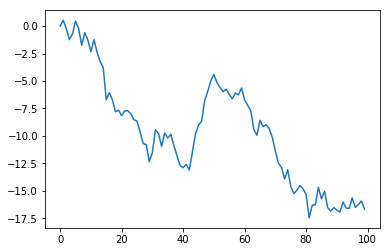

In [104]:
plot(random_walk())
acf_curve(random_walk())

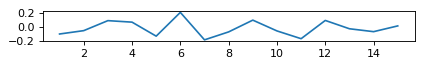

In [103]:
plot(white_noise())
acf_curve(white_noise())

In [102]:
wiener_process,t,n=wiener_process()
plot(wiener_process,t*n,step=1/t)
acf_curve(wiener_process,lag=10000)

 <img src="BoxLjung.png"> 

In [108]:
def BoxLjung(series,m):
    acfs = np.array([acf(series,i) for i in range(1,m+1)])
    dfs = np.array([len(series)-i for i in range(1,m+1)])
    term = np.divide(np.square(acfs),dfs)
    return len(series)*(len(series)+2)*np.sum(term)
    

In [118]:
BoxLjung(random_walk(),1)#75.26977166558552
BoxLjung(white_noise(),3)#5.7223008091166685

5.7223008091166685

In [ ]:
from googlefinance.client import get_price_data, get_prices_data, get_prices_time_data

In [ ]:
# Dow Jones
param = {
    'q': ".DJI", # Stock symbol (ex: "AAPL")
    'i': "86400", # Interval size in seconds ("86400" = 1 day intervals)
    'x': "INDEXDJX", # Stock exchange symbol on which stock is traded (ex: "NASD")
    'p': "1Y" # Period (Ex: "1Y" = 1 year)
}
# get price data (return pandas dataframe)
df = get_price_data(param)

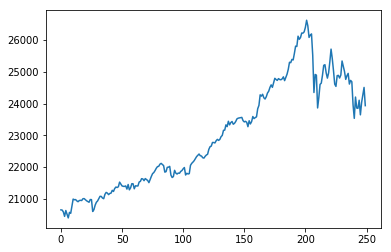

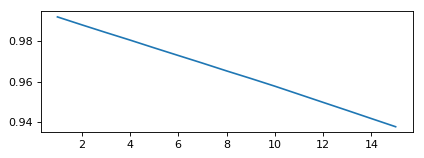

In [136]:
dji_close = df['Close'].values
plot(dji_close,len(dji_close)) # 1Y-trend
acf_curve(dji_close,figsize=(6,2)) #there are some bugs
#                          Open      High       Low     Close     Volume
# 2016-05-17 05:00:00  17531.76   17755.8  17531.76  17710.71   88436105
# 2016-05-18 05:00:00  17701.46  17701.46  17469.92  17529.98  103253947
# 2016-05-19 05:00:00  17501.28  17636.22  17418.21  17526.62   79038923
# 2016-05-20 05:00:00  17514.16  17514.16  17331.07   17435.4   95531058
# 2016-05-21 05:00:00  17437.32  17571.75  17437.32  17500.94  111992332
# ...                       ...       ...       ...       ...        ...

In [ ]:
params = [
    # Dow Jones
    {
        'q': ".DJI",
        'x': "INDEXDJX",
    },
    # NYSE COMPOSITE (DJ)
    {
        'q': "NYA",
        'x': "INDEXNYSEGIS",
    },
    # S&P 500
    {
        'q': ".INX",
        'x': "INDEXSP",
    }
]
period = "1Y"
# get open, high, low, close, volume data (return pandas dataframe)
df = get_prices_data(params, period)
print(df)
#            .DJI_Open  .DJI_High  .DJI_Low  .DJI_Close  .DJI_Volume  \
# 2016-07-20   18503.12   18562.53  18495.11    18559.01    85840786
# 2016-07-21   18582.70   18622.01  18555.65    18595.03    93233337
# 2016-07-22   18589.96   18590.44  18469.67    18517.23    86803016
# 2016-07-23   18524.15   18571.30  18491.59    18570.85    87706622
# 2016-07-26   18554.49   18555.69  18452.62    18493.06    76807470
# ...               ...        ...       ...         ...         ...

In [122]:
params = [
    # Dow Jones
    {
        'q': ".DJI",
        'x': "INDEXDJX",
    },
    # NYSE COMPOSITE (DJ)
    {
        'q': "NYA",
        'x': "INDEXNYSEGIS",
    },
    # S&P 500
    {
        'q': ".INX",
        'x': "INDEXSP",
    }
]
period = "1Y"
interval = 60*30 # 30 minutes
# get open, high, low, close, volume time data (return pandas dataframe)
df = get_prices_time_data(params, period, interval)
print(df[:50])
#                      .DJI_Open  .DJI_High  .DJI_Low  .DJI_Close  .DJI_Volume  \
# 2016-07-19 23:00:00   18503.12   18542.13  18495.11    18522.47            0
# 2016-07-19 23:30:00   18522.44   18553.30  18509.25    18546.27            0
# 2016-07-20 00:00:00   18546.20   18549.59  18519.77    18539.93            0
# 2016-07-20 00:30:00   18540.24   18549.80  18526.99    18534.18            0
# 2016-07-20 01:00:00   18534.05   18540.38  18507.34    18516.41            0
# ...                        ...        ...       ...         ...          ...

                     .DJI_Open  .DJI_High  .DJI_Low  .DJI_Close  .DJI_Volume  \
2017-04-10 22:00:00   20668.22   20715.52  20662.18    20711.16          0.0   
2017-04-10 22:30:00   20710.48   20726.07  20704.21    20724.08          0.0   
2017-04-10 23:00:00   20724.71   20750.33  20724.24    20725.40          0.0   
2017-04-10 23:30:00   20725.80   20735.89  20720.32    20723.15          0.0   
2017-04-11 00:00:00   20723.21   20726.36  20648.85    20666.97          0.0   
2017-04-11 00:30:00   20666.73   20668.93  20614.86    20634.65          0.0   
2017-04-11 01:00:00   20634.65   20707.19  20630.30    20702.81          0.0   
2017-04-11 01:30:00   20703.42   20714.75  20697.58    20702.42          0.0   
2017-04-11 02:00:00   20702.47   20725.57  20702.01    20711.35          0.0   
2017-04-11 02:30:00   20712.32   20712.32  20669.59    20681.50          0.0   
2017-04-11 03:00:00   20681.31   20709.87  20675.82    20698.83          0.0   
2017-04-11 03:30:00   20698.77   20713.2